In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/time_difference_2.csv")
df.sample(5)

,Unnamed: 0,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,...,end_time,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f,time_difference_1,time_difference
258341,268173,1989-05-23,15:30:00,(AP,5510.0,,8.040641,6.066301,146.690891,1989-05-23 15:30:00,...,20:27:00,20:06:00,C,78.0,5497.0,0.005631,C 78,1989-05-23 20:03:00,0 days 04:33:00,0 days 04:33:00
446498,458352,1991-03-30,04:03:00,B,6556.0,BXO,3.000000,8.000000,30.000000,1991-03-30 04:03:00,...,03:40:00,03:21:00,M,12.0,6555.0,0.005631,M 12,1991-03-30 02:59:00,-1 days +22:56:00,0 days 01:04:00
790359,816488,2001-06-22,17:56:00,B,9512.0,DAO,15.000000,8.000000,70.000000,2001-06-22 17:56:00,...,09:36:00,09:29:00,C,42.0,9503.0,0.003300,C 42,2001-06-22 09:21:00,-1 days +15:25:00,0 days 08:35:00
617904,631848,1993-04-12,15:15:00,(AP,7473.0,,8.040641,6.066301,146.690891,1993-04-12 15:15:00,...,03:43:00,03:27:00,C,15.0,7469.0,0.005631,C 15,1993-04-12 03:20:00,-1 days +12:05:00,0 days 11:55:00
451193,463049,1991-04-05,21:35:00,B,6570.0,CSO,2.000000,3.000000,20.000000,1991-04-05 21:35:00,...,09:31:00,08:53:00,C,15.0,6563.0,0.005631,C 15,1991-04-05 08:48:00,-1 days +11:13:00,0 days 12:47:00


#time difference within 24 hours

In [ ]:

df['time_difference_1']=pd.to_timedelta(df['time_difference_1'].str.split().str[-1])
filtered_df = df[df['time_difference_1'] <pd.Timedelta(hours=24)]
filtered_df.sample(5)

,Unnamed: 0,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,...,end_time,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f,time_difference_1,time_difference
486097,498197,1991-07-10,13:19:00,B,6718.0,FKO,35.0,20.0,620.0,1991-07-10 13:19:00,...,07:38:00,07:17:00,C,22.0,6703.0,0.005631,C 22,1991-07-10 07:09:00,0 days 17:50:00,0 days 06:10:00
686811,710613,1999-07-22,12:39:00,B,8643.0,BXO,2.0,3.0,20.0,1999-07-22 12:39:00,...,01:14:00,00:47:00,C,66.0,8636.0,0.032000,C 66,1999-07-22 23:39:00,0 days 11:00:00,0 days 11:00:00
916822,945680,2004-02-05,04:02:00,B,552.0,DAO,7.0,4.0,40.0,2004-02-05 04:02:00,...,02:08:00,02:04:00,B,26.0,10552.0,0.000140,B 26,2004-02-05 01:58:00,0 days 21:56:00,0 days 02:04:00
1026659,1066659,2015-02-06,08:48:00,B,2280.0,DSC,15.0,10.0,90.0,2015-02-06 08:48:00,...,10:29:00,10:17:00,C,14.0,12280.0,0.002100,C 14,2015-02-06 10:02:00,0 days 01:14:00,0 days 01:14:00
400018,411760,1990-11-18,08:28:00,BGD,6368.0,FKI,97.0,23.0,4180.0,1990-11-18 08:28:00,...,15:37:00,15:34:00,C,27.0,6368.0,0.005631,C 27,1990-11-18 15:28:00,0 days 07:00:00,0 days 07:00:00


#Match Region Numbers

In [ ]:
def check_number_match(d):
    reference_str = str(d["NOAA"])
    target_str = str(d["Region_number"])

    # Check if the numbers completely match
    if reference_str == target_str:
        return "matched"

    # Check if the first 5 digits match
    elif reference_str[1:] == target_str[:]:
        return "matched"
    elif reference_str[2:] == target_str[:]:
        return "matched"

    # If neither condition is met
    else:
        return "Not matched"
filtered_df["NOAA_check"]=filtered_df.apply(check_number_match,axis=1)

#Disregarding UNmatched Regions

In [ ]:
filtered_df1=filtered_df[filtered_df["NOAA_check"]=="matched"]

#only M & X class flares

In [ ]:
filtered_df1=filtered_df1[filtered_df1['classification'].isin(["M", "X"])]

checking if the association algorithm worked fine or not

In [ ]:
filtered_df1[filtered_df1['Date']=="2003-05-02"]

,Unnamed: 0,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,...,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f,time_difference_1,time_difference,NOAA_check
895418,923521,2003-05-02,04:05:00,BG,345.0,DAO,15.000000,9.000000,160.000000,2003-05-02 04:05:00,...,03:08:00,M,10.0,10345.0,0.024,M 10,2003-05-02 02:47:00,0 days 22:42:00,0 days 01:18:00,matched
895442,923545,2003-05-02,07:31:00,B,345.0,DAO,9.000000,6.000000,140.000000,2003-05-02 07:31:00,...,03:08:00,M,10.0,10345.0,0.024,M 10,2003-05-02 02:47:00,0 days 19:16:00,0 days 04:44:00,matched
895463,923566,2003-05-02,14:30:00,(BG,345.0,,8.040641,6.066301,146.690891,2003-05-02 14:30:00,...,03:08:00,M,10.0,10345.0,0.024,M 10,2003-05-02 02:47:00,0 days 12:17:00,0 days 11:43:00,matched
895466,923569,2003-05-02,14:30:00,B,345.0,DSO,11.000000,7.000000,90.000000,2003-05-02 14:30:00,...,03:08:00,M,10.0,10345.0,0.024,M 10,2003-05-02 02:47:00,0 days 12:17:00,0 days 11:43:00,matched


In [ ]:
filtered_df1[filtered_df1['Date']=="2003-11-02"]

,Unnamed: 0,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,...,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f,time_difference_1,time_difference,NOAA_check
911588,940306,2003-11-02,22:01:00,BGD,486.0,FKC,60.0,16.0,1890.0,2003-11-02 22:01:00,...,07:53:00,M,10.0,10486.0,0.033,M 10,2003-11-02 06:59:00,0 days 08:58:00,0 days 15:02:00,matched
911590,940308,2003-11-02,22:01:00,BGD,486.0,FKC,60.0,16.0,1890.0,2003-11-02 22:01:00,...,17:25:00,X,83.0,10486.0,0.910,X 83,2003-11-02 17:03:00,0 days 19:02:00,0 days 04:58:00,matched
911597,940315,2003-11-02,22:01:00,BGD,488.0,FKC,32.0,17.0,1440.0,2003-11-02 22:01:00,...,12:47:00,M,18.0,10488.0,0.035,M 18,2003-11-02 12:30:00,0 days 14:29:00,0 days 09:31:00,matched
911624,940342,2003-11-02,15:45:00,BGD,486.0,EKC,47.0,15.0,2290.0,2003-11-02 15:45:00,...,07:53:00,M,10.0,10486.0,0.033,M 10,2003-11-02 06:59:00,0 days 15:14:00,0 days 08:46:00,matched
911626,940344,2003-11-02,15:45:00,BGD,486.0,EKC,47.0,15.0,2290.0,2003-11-02 15:45:00,...,17:25:00,X,83.0,10486.0,0.910,X 83,2003-11-02 17:03:00,0 days 01:18:00,0 days 01:18:00,matched
911633,940351,2003-11-02,15:45:00,BGD,488.0,FKC,19.0,16.0,1680.0,2003-11-02 15:45:00,...,12:47:00,M,18.0,10488.0,0.035,M 18,2003-11-02 12:30:00,0 days 20:45:00,0 days 03:15:00,matched


converting McIntosh classes into the numerical form for model training

In [ ]:
def striping(f):
  return f["McIntosh_class"].strip()
filtered_df1["McIntosh classes"]=filtered_df1.apply(striping, axis=1)
filtered_df1["McIntosh classes"]= filtered_df1["McIntosh classes"].replace('', pd.NA)

In [ ]:
filtered_df1["McIntosh classes"].isna().sum()

2214

In [ ]:
filtered_df1.dropna(subset=["McIntosh classes"],inplace=True)

In [ ]:
filtered_df1[['Class1', 'Class2',"Class3","class4","class5","class6"]]=filtered_df1['McIntosh classes'].str.split("",expand=True)

In [ ]:
filtered_df1.sample(5)

,Unnamed: 0,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,...,time_difference_1,time_difference,NOAA_check,McIntosh classes,Class1,Class2,Class3,class4,class5,class6
489536,501647,1991-07-22,06:44:00,BGD,6734.0,EKI,17.0,14.0,970.0,1991-07-22 06:44:00,...,0 days 03:02:00,0 days 03:02:00,matched,EKI,,E,K,I,,None
22476,22812,1982-03-18,10:03:00,BGD,3643.0,EKC,84.0,13.0,1490.0,1982-03-18 10:03:00,...,0 days 11:21:00,0 days 11:21:00,matched,EKC,,E,K,C,,None
238379,247710,1989-03-07,03:15:00,B,5395.0,DKC,11.0,9.0,750.0,1989-03-07 03:15:00,...,0 days 19:08:00,0 days 19:08:00,matched,DKC,,D,K,C,,None
555109,567420,1992-01-30,17:45:00,BD,7031.0,EKI,43.0,15.0,980.0,1992-01-30 17:45:00,...,0 days 15:50:00,0 days 08:10:00,matched,EKI,,E,K,I,,None
373555,385113,1990-08-27,17:35:00,BG,6226.0,EKI,30.0,14.0,740.0,1990-08-27 17:35:00,...,0 days 10:15:00,0 days 13:45:00,matched,EKI,,E,K,I,,None


In [ ]:
filtered_df1.drop(columns=["Class1","class5","class6"],inplace=True)

In [ ]:
class_1={"A":0.10,"H":0.15,"B":0.30,"C":0.45,"D":0.60,"E":0.75,"F":0.90}
def map_class_1(class_1_value):
    return class_1.get(class_1_value, pd.NA)

filtered_df1["Numeric_class1"]=filtered_df1['Class2'].apply(map_class_1)

class_2={"X":0,"R":0.10,"S":0.30,"A":0.50,"H":0.70,"K":0.90}
def map_class_2(class_2_value):
    return class_2.get(class_2_value, pd.NA)

filtered_df1["Numeric_class2"]=filtered_df1['Class3'].apply(map_class_2)

class_3={"X":0,"O":0.10,"C":0.90,"I":0.50}
def map_class_3(class_3_value):
    return class_3.get(class_3_value, pd.NA)

filtered_df1["Numeric_class3"]=filtered_df1['class4'].apply(map_class_3)




In [ ]:
filtered_df1.sample(5)

,Unnamed: 0,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,...,time_difference_1,time_difference,NOAA_check,McIntosh classes,Class2,Class3,class4,Numeric_class1,Numeric_class2,Numeric_class3
26722,27058,1982-03-24,14:06:00,B,3659.0,EKI,22.0,11.0,1730.0,1982-03-24 14:06:00,...,0 days 07:22:00,0 days 07:22:00,matched,EKI,E,K,I,0.75,0.9,0.5
103493,104994,1983-06-08,13:35:00,BGD,4201.0,FKI,34.0,23.0,1100.0,1983-06-08 13:35:00,...,0 days 21:27:00,0 days 02:33:00,matched,FKI,F,K,I,0.90,0.9,0.5
180882,189382,1988-06-30,17:25:00,BGD,5060.0,FKC,82.0,22.0,2530.0,1988-06-30 17:25:00,...,0 days 15:39:00,0 days 08:21:00,matched,FKC,F,K,C,0.90,0.9,0.9
238925,248256,1989-03-16,15:53:00,BGD,5395.0,FKC,57.0,19.0,3300.0,1989-03-16 15:53:00,...,0 days 10:01:00,0 days 13:59:00,matched,FKC,F,K,C,0.90,0.9,0.9
49728,50480,1982-07-12,02:50:00,GD,3804.0,FKC,82.0,18.0,1780.0,1982-07-12 02:50:00,...,0 days 06:26:00,0 days 06:26:00,matched,FKC,F,K,C,0.90,0.9,0.9


calculating normalized fourth component for model

In [ ]:
class_2={"X":1,"R":2,"S":3,"A":4,"H":5,"K":6}
def map_class_2(f):
  return class_2.get(f, pd.NA)
filtered_df1["calc"]=filtered_df1['Class3'].apply(map_class_2)

def p_component(f):
  return f["calc"]/6
filtered_df1["p_component"]=filtered_df1.apply(p_component,axis=1)

def normalize(f):
  return f["area"]/1000
filtered_df1["normalized_area"]=filtered_df1.apply(normalize,axis=1)

def calculation(f):
  x=abs((f["normalized_area"]-f["p_component"])*f["normalized_area"])
  return x
filtered_df1["fourth_comp"]=filtered_df1.apply(calculation,axis=1)


In [ ]:
filtered_df1.sample(5)

,Unnamed: 0,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,...,Class2,Class3,class4,Numeric_class1,Numeric_class2,Numeric_class3,calc,p_component,normalized_area,fourth_comp
772549,798322,2001-03-10,01:05:00,BG,9368.0,EHO,17.0,11.0,310.0,2001-03-10 01:05:00,...,E,H,O,0.75,0.7,0.1,5,0.833333,0.31,0.162233
223828,233057,1989-01-14,03:30:00,BGD,5312.0,FKC,42.0,16.0,1540.0,1989-01-14 03:30:00,...,F,K,C,0.90,0.9,0.9,6,1.0,1.54,0.8316
453491,465347,1991-04-16,14:05:00,BG,6580.0,DKO,11.0,6.0,470.0,1991-04-16 14:05:00,...,D,K,O,0.60,0.9,0.1,6,1.0,0.47,0.2491
594132,607274,1992-09-06,15:35:00,BGD,7270.0,EKI,30.0,14.0,530.0,1992-09-06 15:35:00,...,E,K,I,0.75,0.9,0.5,6,1.0,0.53,0.2491
223646,232875,1989-01-08,17:59:00,BGD,5312.0,FKC,44.0,21.0,1420.0,1989-01-08 17:59:00,...,F,K,C,0.90,0.9,0.9,6,1.0,1.42,0.5964


normalizing sunspot numbers

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_to_scale = 'Number of sunspots'

# Extract the column as a 2D array (reshape if needed)
column_data = filtered_df1[column_to_scale].values.reshape(-1, 1)
scaled_column = scaler.fit_transform(column_data)

# Update the DataFrame with the scaled values
filtered_df1[column_to_scale] = abs(scaled_column)
filtered_df1.sample(5)

,Unnamed: 0,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,...,Class2,Class3,class4,Numeric_class1,Numeric_class2,Numeric_class3,calc,p_component,normalized_area,fourth_comp
223959,233188,1989-01-18,04:20:00,,5312.0,FKC,0.807234,20.0,760.0,1989-01-18 04:20:00,...,F,K,C,0.90,0.9,0.9,6,1.0,0.76,0.1824
180576,189076,1988-06-25,15:41:00,B,5060.0,EKI,1.086608,11.0,570.0,1988-06-25 15:41:00,...,E,K,I,0.75,0.9,0.5,6,1.0,0.57,0.2451
79041,80153,1982-12-11,21:04:00,BGD,4014.0,EKI,0.388172,15.0,500.0,1982-12-11 21:04:00,...,E,K,I,0.75,0.9,0.5,6,1.0,0.50,0.25
530164,542422,1991-10-26,16:15:00,BGD,6891.0,FKC,1.226295,26.0,1760.0,1991-10-26 16:15:00,...,F,K,C,0.90,0.9,0.9,6,1.0,1.76,1.3376
157081,164346,1987-08-23,12:48:00,B,4845.0,DRO,0.760671,4.0,70.0,1987-08-23 12:48:00,...,D,R,O,0.60,0.1,0.1,2,0.333333,0.07,0.018433


In [ ]:
filtered_df1.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Mount Wilson Class', 'Region_number',
       'McIntosh_class', 'Number of sunspots', 'length', 'area', 'Date_time_s',
       'start_time', 'end_time', 'peak_time', 'classification', 'type', 'NOAA',
       'xray_flux', 'Classification+type', 'Date_time_f', 'time_difference_1',
       'time_difference', 'NOAA_check', 'McIntosh classes', 'Class2', 'Class3',
       'class4', 'Numeric_class1', 'Numeric_class2', 'Numeric_class3', 'calc',
       'p_component', 'normalized_area', 'fourth_comp'],
      dtype='object')

dropping unnecessary columns

In [ ]:
filtered_df1.drop(columns=['Unnamed: 0','Time', 'Mount Wilson Class', 'Region_number',
                           'McIntosh_class','Date_time_s','start_time', 'end_time', 'peak_time',
                           'type', 'NOAA','Classification+type', 'Date_time_f', 'time_difference_1',
                           'time_difference', 'NOAA_check', 'McIntosh classes','Class2', 'Class3',
                           'class4','calc','p_component'
                           ],inplace=True)    #,'xray_flux'

In [ ]:
filtered_df1.set_index("Date",inplace=True)
filtered_df1.sort_index(inplace=True)


In [ ]:
filtered_df1.tail(5)

,Number of sunspots,length,area,classification,xray_flux,Numeric_class1,Numeric_class2,Numeric_class3,normalized_area,fourth_comp
Date,,,,,,,,,,
2017-04-02,0.248485,23.0,550.0,M,0.0610,0.90,0.5,0.5,0.55,0.064167
2017-04-03,0.667547,18.0,620.0,M,0.0082,0.90,0.9,0.9,0.62,0.2356
2017-04-03,0.527859,14.0,480.0,M,0.0310,0.75,0.9,0.9,0.48,0.2496
2017-04-03,0.667547,18.0,620.0,M,0.0310,0.90,0.9,0.9,0.62,0.2356
2017-04-03,0.527859,14.0,480.0,M,0.0082,0.75,0.9,0.9,0.48,0.2496


area normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_to_scale = 'area'

# Extract the column as a 2D array (reshape if needed)
column_data = filtered_df1[column_to_scale].values.reshape(-1, 1)
scaled_column = scaler.fit_transform(column_data)

# Update the DataFrame with the scaled values
filtered_df1[column_to_scale] = abs(scaled_column)


length normalizations

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_to_scale = 'length'

# Extract the column as a 2D array (reshape if needed)
column_data = filtered_df1[column_to_scale].values.reshape(-1, 1)
scaled_column = scaler.fit_transform(column_data)

# Update the DataFrame with the scaled values
filtered_df1[column_to_scale] = abs(scaled_column)


converting M and X labels into O and 1

In [ ]:
filtered_df1['classification'] = filtered_df1['classification'].map({'M': 0, 'X': 1})
filtered_df1.sample(5)

,Number of sunspots,length,area,classification,xray_flux,Numeric_class1,Numeric_class2,Numeric_class3,normalized_area,fourth_comp
Date,,,,,,,,,,
2013-11-02,0.667547,0.466832,0.588470,0,0.006400,0.60,0.5,0.1,0.260000,0.105733
1989-08-12,0.775888,0.205555,0.597562,0,0.005631,0.75,0.9,0.9,1.140000,0.1596
1990-12-12,1.086608,1.139220,0.741184,0,0.005631,0.10,<NA>,0,0.146691,<NA>
1988-11-21,0.760671,1.139220,0.871500,0,0.005631,0.30,0,0.1,0.050000,0.005833
1982-06-15,1.179733,1.811607,0.723246,0,0.005631,0.15,0.3,0,0.160000,0.0544


In [ ]:
filtered_df1.shape

(15233, 10)

In [ ]:
filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15233 entries, 1981-12-01 to 2017-04-03
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of sunspots  15233 non-null  float64
 1   length              15233 non-null  float64
 2   area                15233 non-null  float64
 3   classification      15233 non-null  int64  
 4   xray_flux           15233 non-null  float64
 5   Numeric_class1      15233 non-null  float64
 6   Numeric_class2      14978 non-null  object 
 7   Numeric_class3      14674 non-null  object 
 8   normalized_area     15233 non-null  float64
 9   fourth_comp         14978 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
filtered_df1.isna().sum()

Number of sunspots      0
length                  0
area                    0
classification          0
xray_flux               0
Numeric_class1          0
Numeric_class2        255
Numeric_class3        559
normalized_area         0
fourth_comp           255
dtype: int64

In [ ]:
filtered_df1.dropna(inplace=True)

In [ ]:
filtered_df1["fourth_comp"]=filtered_df1['fourth_comp'].astype(float)
filtered_df1['Numeric_class2']=filtered_df1['Numeric_class2'].astype(float)
filtered_df1['Numeric_class3']=filtered_df1['Numeric_class3'].astype(float)

In [ ]:
filtered_df1.groupby("classification").mean("xray_flux")

,Number of sunspots,length,area,xray_flux,Numeric_class1,Numeric_class2,Numeric_class3,normalized_area,fourth_comp
classification,,,,,,,,,
0,0.781630,0.756905,0.703903,0.012238,0.714562,0.702977,0.467362,0.697577,0.554878
1,0.816228,0.785437,0.817610,0.085755,0.740797,0.805028,0.568501,0.986003,1.004478


In [ ]:
x=filtered_df1[filtered_df1['xray_flux']<=0.01]
x["classification"].value_counts()

0    10752
1      693
Name: classification, dtype: int64

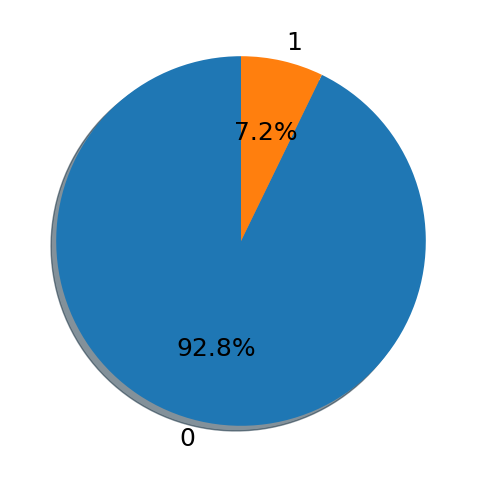

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(6,6)
unique_elements, counts_elements= np.unique(filtered_df1['classification'],return_counts=True)
fig1,ax1=plt.subplots()
ax1.pie(counts_elements,labels=unique_elements,autopct="%1.1f%%",shadow=True,startangle=90,textprops={"fontsize":18})
plt.show()


Data is highly imbalanced only 7.2% of X class flares and 92.8% are M class flares

splitting the data into train and test for training and testing the model

In [ ]:
X = filtered_df1.drop(columns=['classification',"xray_flux"], axis=1)
y = filtered_df1['classification']
round(X.shape[0]*0.80,0)

11699.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


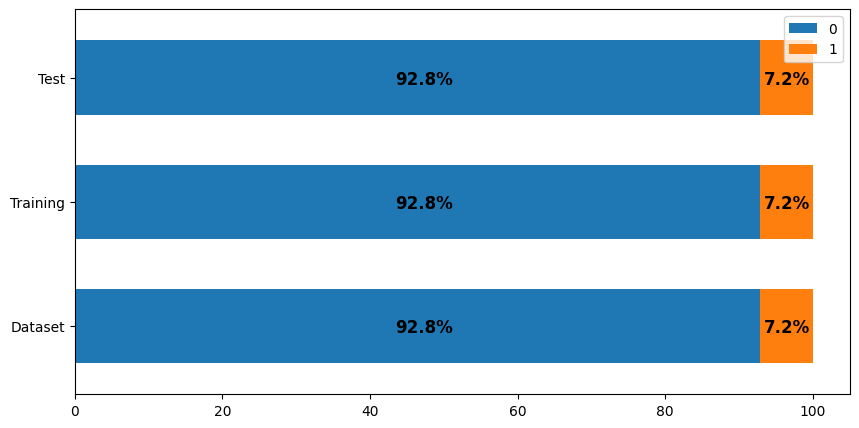

In [ ]:
# Define a dataframe containing frequency percentages
df_perc = pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                     y_train.value_counts(normalize=True).mul(100).round(1),
                     y_test.value_counts(normalize=True).mul(100).round(1)], axis=1)
df_perc.columns=['Dataset','Training','Test']
df_perc = df_perc.T

# Plot frequency percentages barplot
df_perc.plot(kind='barh', stacked=True, figsize=(10,5), width=0.6)

# Add the percentages to our plot
for idx, val in enumerate([*df_perc.index.values]):
    for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
        plt.text(x=(y_location - percentage) + (percentage / 2)-3,
                 y=idx - 0.05,
                 s=f'{percentage}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

In [ ]:
#X_train=X.iloc[0:11699,:]
#X_test=X.iloc[11699:,:]
#y_train=y.iloc[0:11699]
#y_test=y.iloc[11699:]

#logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log_class=LogisticRegression()
grid={"C":10.0**np.arange(-2,3),"penalty":["l1","l2"]}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring="f1_micro")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2714    0]
 [ 211    0]]
0.9278632478632478
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2714
           1       0.00      0.00      0.00       211

    accuracy                           0.93      2925
   macro avg       0.46      0.50      0.48      2925
weighted avg       0.86      0.93      0.89      2925



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
y_prob=clf.predict_proba(X_test)
y_prob

array([[0.95597061, 0.04402939],
       [0.92511228, 0.07488772],
       [0.94380174, 0.05619826],
       ...,
       [0.9392918 , 0.0607082 ],
       [0.92942269, 0.07057731],
       [0.89465774, 0.10534226]])

In [ ]:
import numpy as np

# Assuming y_scores is the array of predicted probabilities
threshold = 0.075

# Apply thresholding to get the predicted labels
predicted_labels = np.where(y_prob[:, 1] > threshold, 1, 0)

# Now 'predicted_labels' contains the binary predictions based on the threshold
predicted_labels
print(confusion_matrix(y_test,predicted_labels))
print(accuracy_score(y_test,predicted_labels))
print(classification_report(y_test,predicted_labels))

[[1646 1068]
 [  83  128]]
0.6064957264957265
              precision    recall  f1-score   support

           0       0.95      0.61      0.74      2714
           1       0.11      0.61      0.18       211

    accuracy                           0.61      2925
   macro avg       0.53      0.61      0.46      2925
weighted avg       0.89      0.61      0.70      2925



#RandomForest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#class_weight=dict({"0.1":1,"0.9":1000})
classifier=RandomForestClassifier()
grid={"criterion":["gini","entropy","log_loss"],"max_depth":[1,10,20,100],"max_features":[1,2,3,4,5,6,7]}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
classifier=GridSearchCV(classifier,grid,cv=cv,n_jobs=-1,scoring="f1_macro")

classifier.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 10, 20, 100],
                         'max_features': [1, 2, 3, 4, 5, 6, 7]},
             scoring='f1_macro')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred=classifier.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
print(f"Accuracy Socre: {round(accuracy_score(y_test,y_pred)*100,2)}%")
print("---------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))
print("---------------------------------------------------------")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Accuracy Socre: 88.51%
---------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2714
           1       0.16      0.14      0.15       211

    accuracy                           0.89      2925
   macro avg       0.55      0.54      0.54      2925
weighted avg       0.88      0.89      0.88      2925

---------------------------------------------------------
Confusion Matrix
[[2560  154]
 [ 182   29]]


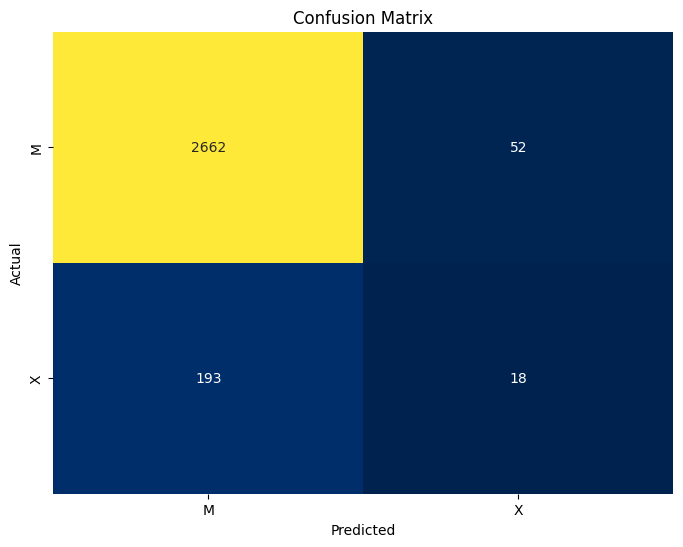

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['M', 'X'], yticklabels=['M', 'X'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Due to imbalanced data models are not predicting X class flares at all so need to balance it

#SMOTomek
data balancing Technique

In [ ]:
from imblearn.combine import SMOTETomek
st=SMOTETomek()
X_train_st,y_train_st=st.fit_resample(X_train,y_train)


after doing the SMOTomek running the model again

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#class_weight=dict({"0.1":1,"0.9":1000})
classifier=RandomForestClassifier()
grid={"criterion":["gini","entropy","log_loss"],"max_depth":[1,10,20,100],"max_features":["sqrt","log","None"]}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
classifier=GridSearchCV(classifier,grid,cv=cv,n_jobs=-1,scoring="f1_macro")

classifier.fit(X_train_st,y_train_st)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 10, 20, 100],
                         'max_features': ['sqrt', 'log', 'None']},
             scoring='f1_macro')

In [ ]:

y_pred=classifier.predict(X_test)
print(f"Accuracy Score: {round(accuracy_score(y_test,y_pred)*100,2)}%")
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------")

print(confusion_matrix(y_test,y_pred))



Accuracy Score: 88.51%
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2714
           1       0.16      0.14      0.15       211

    accuracy                           0.89      2925
   macro avg       0.55      0.54      0.54      2925
weighted avg       0.88      0.89      0.88      2925

----------------------------------------------------------
[[2560  154]
 [ 182   29]]


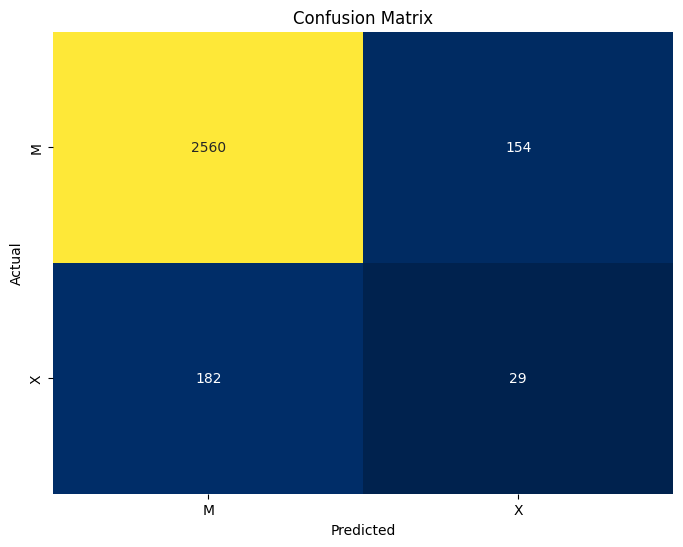

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['M', 'X'], yticklabels=['M', 'X'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Precision/recall

In [ ]:
y_prob=classifier.predict_proba(X_test)
y_prob

array([[0.63      , 0.37      ],
       [0.98183333, 0.01816667],
       [0.79666667, 0.20333333],
       ...,
       [1.        , 0.        ],
       [0.98714286, 0.01285714],
       [0.62875   , 0.37125   ]])

In [ ]:
import numpy as np
def check_(y_prob,value):
# Assuming y_scores is the array of predicted probabilities
  threshold = value

# Apply thresholding to get the predicted labels
  predicted_labels = np.where(y_prob[:, 1] > threshold, 1, 0)
  y_pred=classifier.predict(X_test)
  print(confusion_matrix(y_test,predicted_labels))
  print(accuracy_score(y_test,predicted_labels))
  print(classification_report(y_test,predicted_labels))

In [ ]:
def tradeoff(y_prob):
  pr_list=[]
  re_list=[]
  thresh=[]
  for i in range(-70,100,1):
    value = i / 100.0
    thresh.append(value)

    import numpy as np

# Assuming y_scores is the array of predicted probabilities
    threshold = value

# Apply thresholding to get the predicted labels
    predicted_labels = np.where(y_prob[:, 1] > threshold, 1, 0)

# Now 'predicted_labels' contains the binary predictions based on the threshold
    predicted_labels
    pr = precision_score(
      y_test,
      predicted_labels,
      labels=None,
      pos_label=1,
      average='binary',
      sample_weight=None,
      zero_division='warn',
                 )
    pr_list.append(pr)
    re = recall_score(
        y_test,
        predicted_labels,
        labels=None,
        pos_label=1,
        average='binary',
        sample_weight=None,
        zero_division='warn',
       )
    re_list.append(re)

  return pr_list,re_list,thresh



In [ ]:
def plot_(thresh,re_list,pr_list):
  plt.figure(figsize=(8,6))

  plt.plot(thresh,re_list,label="recall",color="red")
  plt.plot(thresh,pr_list,label="precision",color="green")
#plt.axvline(x=0.53, color='blue', linestyle='--', label='balanced')
#plt.text(0.53, 0.4, '0.53', color='blue', rotation=45, va='baseline',size="large",style="oblique")

#plt.axvline(x=0.60, color='black', linestyle='--', label='best Precision')
#plt.axvline(x=0.30, color='lime', linestyle='--', label='best Recall')
  plt.xlabel("Threshold Value")
  plt.title("Precision/Recall Tradeoff")
  plt.legend()
  plt.show()


In [ ]:
precision_list , recall_list, thresh=tradeoff(y_prob)

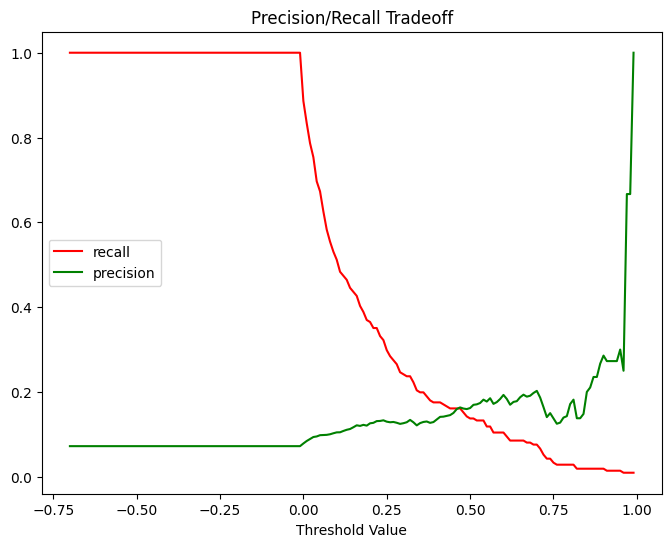

In [ ]:
plot_(thresh,recall_list,precision_list)

In [ ]:
check_(y_prob,0.09)

[[1734  980]
 [  99  112]]
0.6311111111111111
              precision    recall  f1-score   support

           0       0.95      0.64      0.76      2714
           1       0.10      0.53      0.17       211

    accuracy                           0.63      2925
   macro avg       0.52      0.58      0.47      2925
weighted avg       0.89      0.63      0.72      2925



Random forest only predicted 21 X class flares after doing the data balancing

#SMOTENN

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42,sampling_strategy=0.90)
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X_train, y_train)


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#class_weight=dict({"0.1":1,"0.9":1000})
classifier=RandomForestClassifier()
grid={"criterion":["gini","entropy","log_loss"],"max_depth":[1,10,20,100],"max_features":["sqrt","log","None"]}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
classifier=GridSearchCV(classifier,grid,cv=cv,n_jobs=-1,scoring="f1_macro")

classifier.fit(X_smoteenn,y_smoteenn)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 10, 20, 100],
                         'max_features': ['sqrt', 'log', 'None']},
             scoring='f1_macro')

In [ ]:

y_pred=classifier.predict(X_test)
print(f"Accuracy Score: {round(accuracy_score(y_test,y_pred)*100,2)}%")
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------")

print(confusion_matrix(y_test,y_pred))



Accuracy Score: 83.38%
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2714
           1       0.16      0.29      0.20       211

    accuracy                           0.83      2925
   macro avg       0.55      0.58      0.56      2925
weighted avg       0.88      0.83      0.86      2925

----------------------------------------------------------
[[2377  337]
 [ 149   62]]


In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2386  328]
 [ 147   64]]
0.8376068376068376
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2714
           1       0.16      0.30      0.21       211

    accuracy                           0.84      2925
   macro avg       0.55      0.59      0.56      2925
weighted avg       0.89      0.84      0.86      2925



In [ ]:
y_prob=classifier.predict_proba(X_test)

In [ ]:
re_list,pr_list,thresh=tradeoff(y_prob)

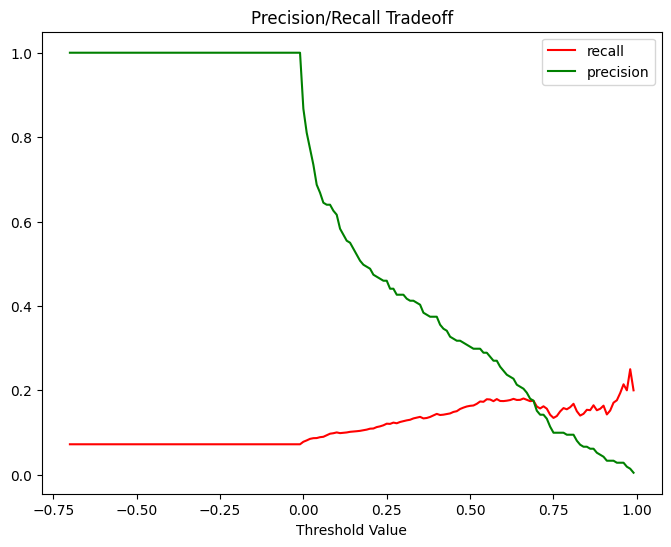

In [ ]:
plot_(thresh,re_list,pr_list)

In [ ]:
check_(y_prob,0.30)

[[2095  619]
 [ 121   90]]
0.747008547008547
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2714
           1       0.13      0.43      0.20       211

    accuracy                           0.75      2925
   macro avg       0.54      0.60      0.52      2925
weighted avg       0.89      0.75      0.80      2925



#Random oversampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#class_weight=dict({"0.1":1,"0.9":1000})
classifier=RandomForestClassifier()
grid={"criterion":["gini","entropy","log_loss"],"max_depth":[1,10,20,100],"max_features":["sqrt","log","None"]}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
classifier=GridSearchCV(classifier,grid,cv=cv,n_jobs=-1,scoring="f1_macro")

classifier.fit(X_ros,y_ros)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 10, 20, 100],
                         'max_features': ['sqrt', 'log', 'None']},
             scoring='f1_macro')

In [ ]:
best=classifier.best_estimator_
best.fit(X_ros,y_ros)

RandomForestClassifier(max_depth=100)

In [ ]:

y_pred=best.predict(X_test)
print(f"Accuracy Score: {round(accuracy_score(y_test,y_pred)*100,2)}%")
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------")

print(confusion_matrix(y_test,y_pred))



Accuracy Score: 86.26%
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2714
           1       0.18      0.27      0.22       211

    accuracy                           0.86      2925
   macro avg       0.56      0.59      0.57      2925
weighted avg       0.89      0.86      0.87      2925

----------------------------------------------------------
[[2467  247]
 [ 155   56]]


In [ ]:
y_pred=best.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2475  239]
 [ 156   55]]
0.864957264957265
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2714
           1       0.19      0.26      0.22       211

    accuracy                           0.86      2925
   macro avg       0.56      0.59      0.57      2925
weighted avg       0.89      0.86      0.88      2925



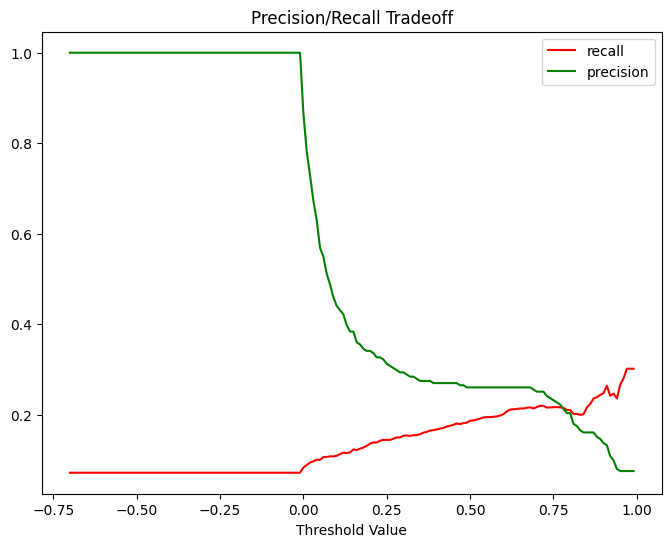

In [ ]:
y_prob=best.predict_proba(X_test)
re_list,pr_list,thresh=tradeoff(y_prob)
plot_(thresh,re_list,pr_list)

In [ ]:
check_(y_prob,0.13)

[[2071  643]
 [ 127   84]]
0.7367521367521368
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      2714
           1       0.12      0.40      0.18       211

    accuracy                           0.74      2925
   macro avg       0.53      0.58      0.51      2925
weighted avg       0.88      0.74      0.80      2925



#SVM

##1.1 -kernel="rbf", random_state=42,C=1,gamma=10 these parameters with the data balanced by using SMOTomek technique

Accuracy : 0.73


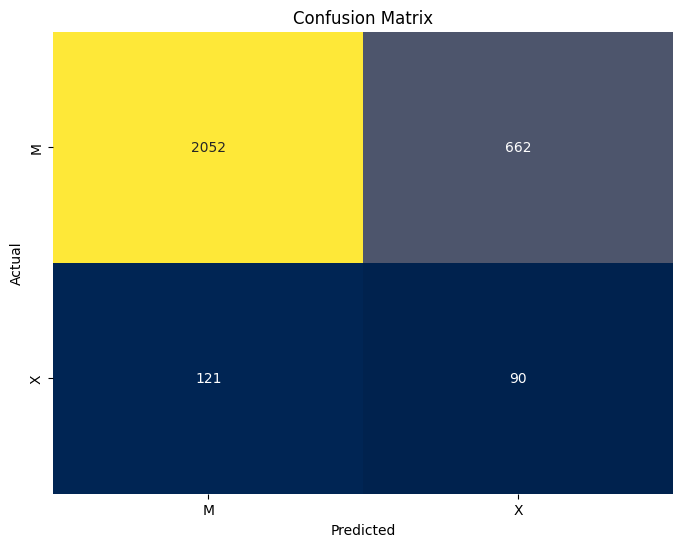

In [ ]:
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
#st=SMOTETomek()
clf = SVC(kernel="rbf", random_state=42,C=1,gamma=10,probability=True)
#pipe=Pipeline([('sampling', SMOTETomek(sampling_strategy='auto')),('classification', RandomForestClassifier())])
clf.fit(X_train_st,y_train_st)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['M', 'X'], yticklabels=['M', 'X'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [ ]:

y_pred=clf.predict(X_test)
print(f"Accuracy Score: {round(accuracy_score(y_test,y_pred)*100,2)}%")
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------")

print(confusion_matrix(y_test,y_pred))



Accuracy Score: 73.23%
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      2714
           1       0.12      0.43      0.19       211

    accuracy                           0.73      2925
   macro avg       0.53      0.59      0.51      2925
weighted avg       0.88      0.73      0.79      2925

----------------------------------------------------------
[[2052  662]
 [ 121   90]]


In [ ]:
def ploting(clf):
  y_prob=clf.predict_proba(X_test)
  re_list,pr_list,thresh=tradeoff(y_prob)
  plot_(thresh,re_list,pr_list)
ploting(clf)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

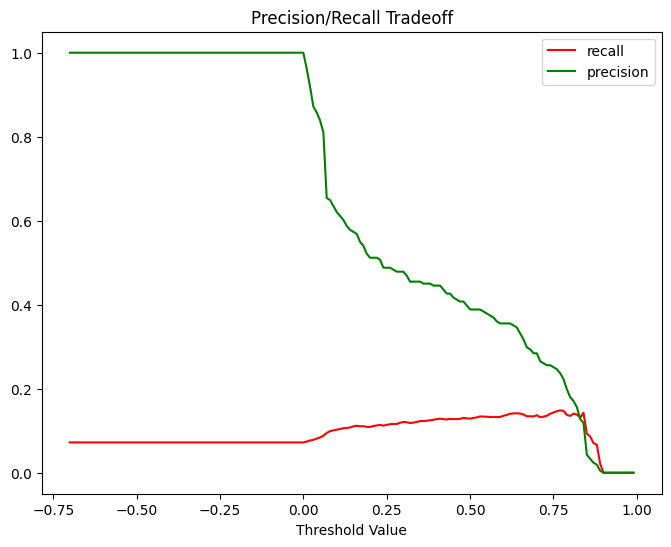

In [ ]:
y_prob=clf.predict_proba(X_test)
re_list,pr_list,thresh=tradeoff(y_prob)
plot_(thresh,re_list,pr_list)

In [ ]:
check_(y_prob,0.15)

[[1739  975]
 [  90  121]]
0.6358974358974359
              precision    recall  f1-score   support

           0       0.95      0.64      0.77      2714
           1       0.11      0.57      0.19       211

    accuracy                           0.64      2925
   macro avg       0.53      0.61      0.48      2925
weighted avg       0.89      0.64      0.72      2925



##1.2 -kernel="rbf", random_state=42,C=1,gamma=10 these parameters with the data balanced by using SMOTENN technique





Accuracy : 0.62


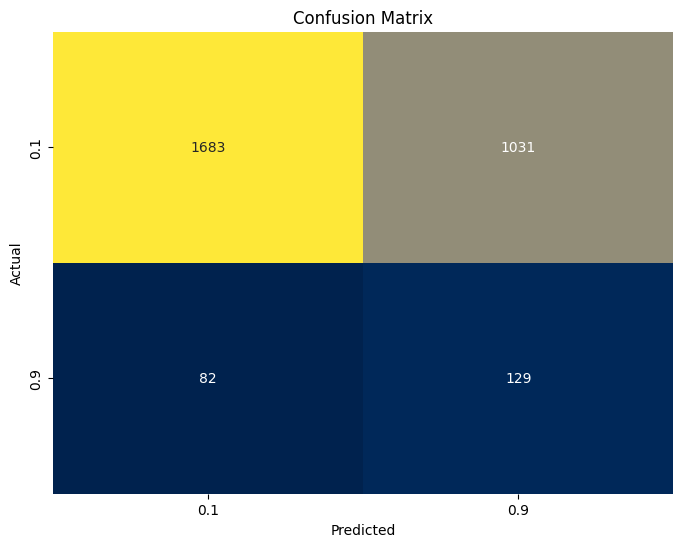

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", random_state=42,C=1,gamma=1,probability=True)
clf.fit(X_smoteenn,y_smoteenn)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0.1', '0.9'], yticklabels=['0.1', '0.9'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [ ]:

y_pred=clf.predict(X_test)
print(f"Accuracy Score: {round(accuracy_score(y_test,y_pred)*100,2)}%")
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------")

print(confusion_matrix(y_test,y_pred))



Accuracy Score: 61.95%
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.62      0.75      2714
           1       0.11      0.61      0.19       211

    accuracy                           0.62      2925
   macro avg       0.53      0.62      0.47      2925
weighted avg       0.89      0.62      0.71      2925

----------------------------------------------------------
[[1683 1031]
 [  82  129]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

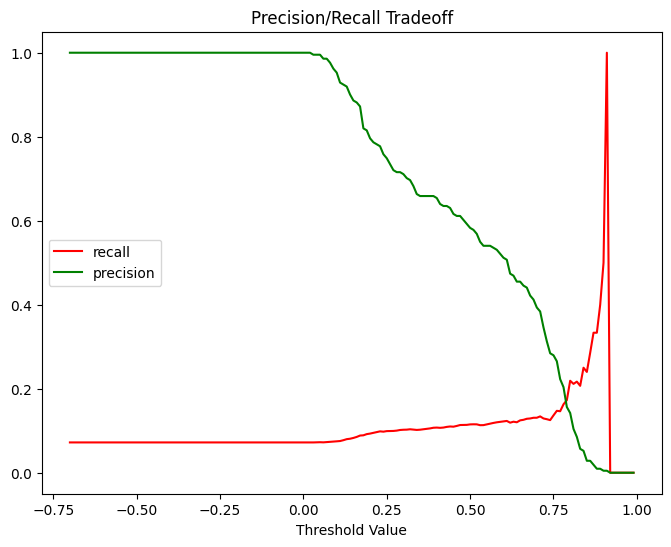

In [ ]:
def ploting(clf):
  y_prob=clf.predict_proba(X_test)
  re_list,pr_list,thresh=tradeoff(y_prob)
  plot_(thresh,re_list,pr_list)

ploting(clf)

In [ ]:
y_prob=clf.predict_proba(X_test)
check_(y_prob,0.55)

[[1838  876]
 [  97  114]]
0.6673504273504274
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      2714
           1       0.12      0.54      0.19       211

    accuracy                           0.67      2925
   macro avg       0.53      0.61      0.49      2925
weighted avg       0.89      0.67      0.75      2925



##1.3 -kernel="rbf", random_state=42,C=1,gamma=10 these parameters with the data balanced by using RANDOM OVERSAMPLER technique





Accuracy : 0.74


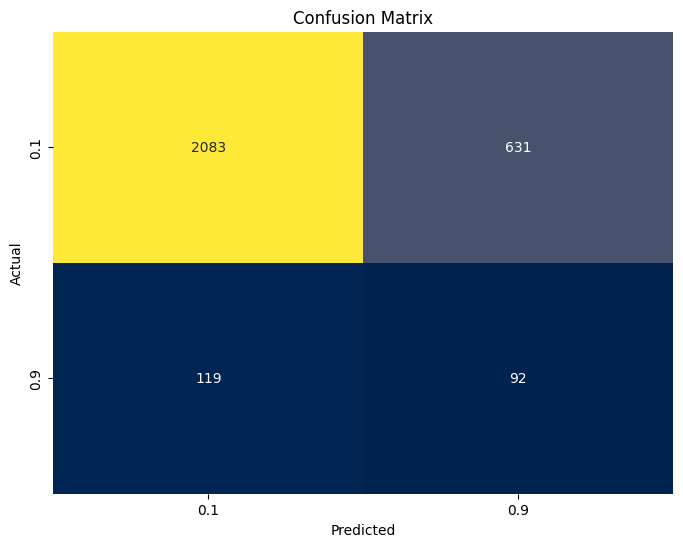

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", random_state=42,C=1,gamma=10,probability=True)
clf.fit(X_ros,y_ros)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0.1', '0.9'], yticklabels=['0.1', '0.9'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [ ]:

y_pred=clf.predict(X_test)
print(f"Accuracy Score: {round(accuracy_score(y_test,y_pred)*100,2)}%")
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------")

print(confusion_matrix(y_test,y_pred))



Accuracy Score: 60.92%
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.61      0.74      2714
           1       0.11      0.64      0.19       211

    accuracy                           0.61      2925
   macro avg       0.53      0.63      0.47      2925
weighted avg       0.90      0.61      0.70      2925

----------------------------------------------------------
[[1646 1068]
 [  75  136]]


In [ ]:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Calculate recall score
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

Precision: 0.11295681063122924
Recall: 0.6445497630331753


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

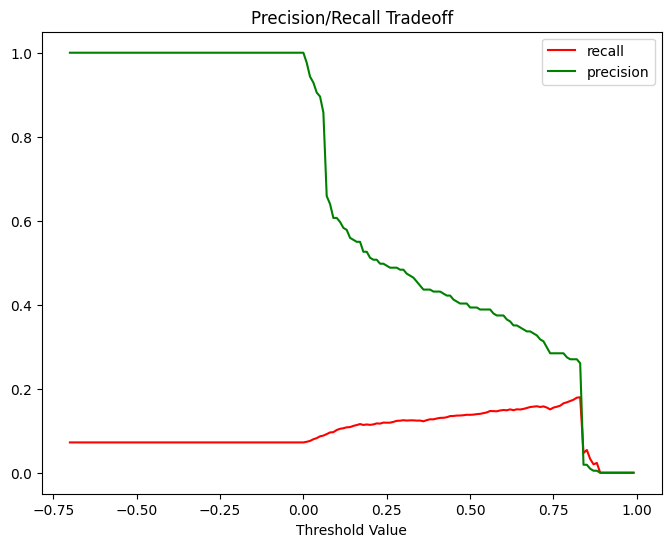

In [ ]:
ploting(clf)

##2.1 -kernel="rbf", random_state=42,C=0.1,gamma=10 these parameters with the data balanced by using SMOTomek technique

Accuracy : 0.70


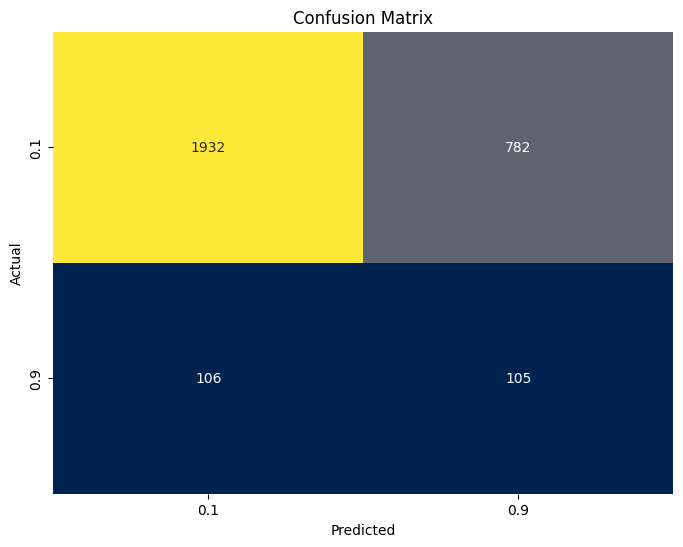

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", random_state=42,C=0.1,gamma=10)
clf.fit(X_train_st,y_train_st)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0.1', '0.9'], yticklabels=['0.1', '0.9'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

##2.2 -kernel="rbf", random_state=42,C=0.1,gamma=10 these parameters with the data balanced by using SMOTENN technique

Accuracy : 0.71


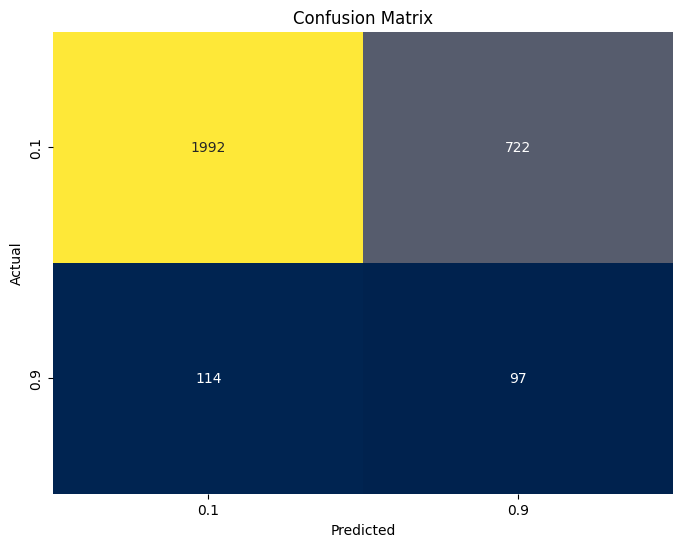

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", random_state=42,C=0.1,gamma=10)
clf.fit(X_smoteenn,y_smoteenn)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0.1', '0.9'], yticklabels=['0.1', '0.9'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

##2.3 -kernel="rbf", random_state=42,C=0.1,gamma=10 these parameters with the data balanced by using RANDOMOVERSAMPLER technique

Accuracy : 0.68


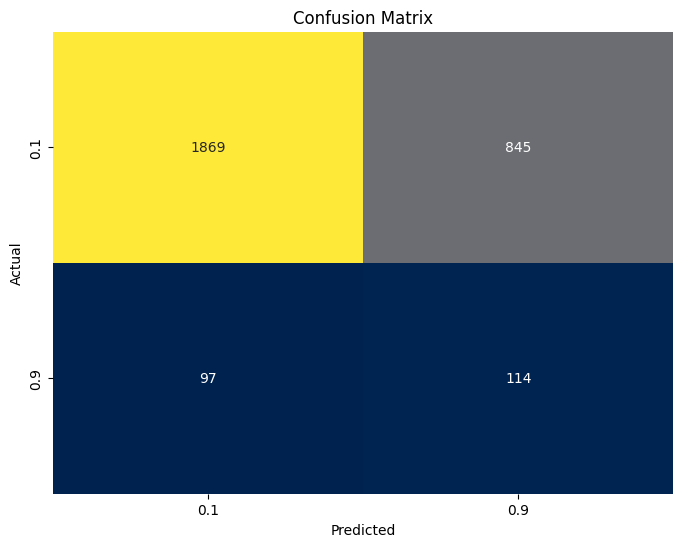

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", random_state=42,C=0.1,gamma=10)
clf.fit(X_ros,y_ros)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0.1', '0.9'], yticklabels=['0.1', '0.9'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

##3.1 -kernel="rbf", random_state=42,C=1,gamma=1 these parameters with the data balanced by using SMOTomek technique

Accuracy : 0.61


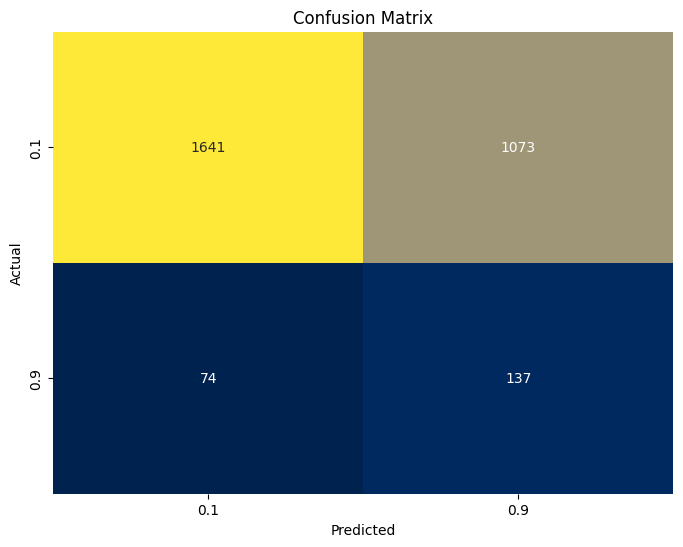

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", random_state=42,C=1,gamma=1,probability=True)
clf.fit(X_train_st,y_train_st)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0.1', '0.9'], yticklabels=['0.1', '0.9'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [ ]:

y_pred=clf.predict(X_test)
print(f"Accuracy Score: {round(accuracy_score(y_test,y_pred)*100,2)}%")
print("----------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------")

print(confusion_matrix(y_test,y_pred))



Accuracy Score: 60.79%
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      2714
           1       0.11      0.65      0.19       211

    accuracy                           0.61      2925
   macro avg       0.54      0.63      0.47      2925
weighted avg       0.90      0.61      0.70      2925

----------------------------------------------------------
[[1641 1073]
 [  74  137]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Calculate recall score
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

Precision: 0.11322314049586776
Recall: 0.6492890995260664


In [ ]:
y_prob=clf.predict_proba(X_test)

In [ ]:
precision_list , recall_list, thresh=tradeoff(y_prob)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [ ]:
precision

0.11322314049586776

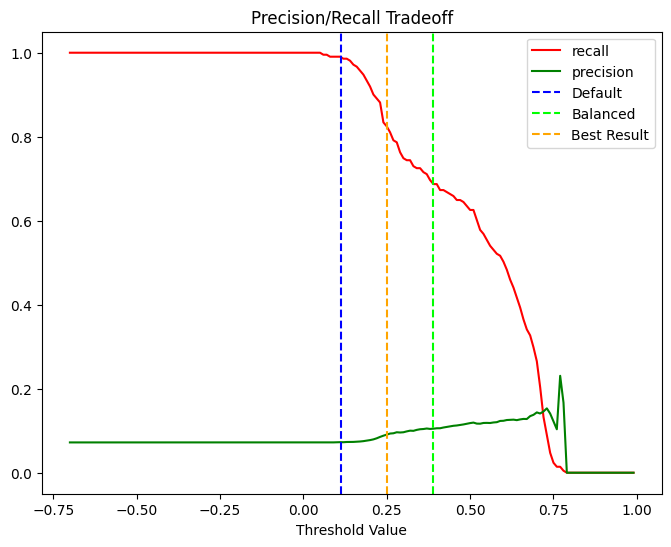

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(thresh,recall_list,label="recall",color="red")
plt.plot(thresh,precision_list,label="precision",color="green")
plt.axvline(x=precision, color='blue', linestyle='--', label='Default')
#plt.text(0.55, 0.4, '0.53', color='blue', rotation=45, va='baseline',size="large",style="oblique")

#plt.axvline(x=0.60, color='black', linestyle='--', label='best Precision')
plt.axvline(x=0.39, color='lime', linestyle='--', label='Balanced')
plt.axvline(x=0.25, color='orange', linestyle='--', label='Best Result')

plt.xlabel("Threshold Value")
plt.title("Precision/Recall Tradeoff")
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Assuming y_scores is the array of predicted probabilities
threshold = 0.25

# Apply thresholding to get the predicted labels
predicted_labels = np.where(y_prob[:, 1] > threshold, 1, 0)

# Now 'predicted_labels' contains the binary predictions based on the threshold
predicted_labels

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_labels)

print(cm)

[[ 971 1743]
 [  37  174]]


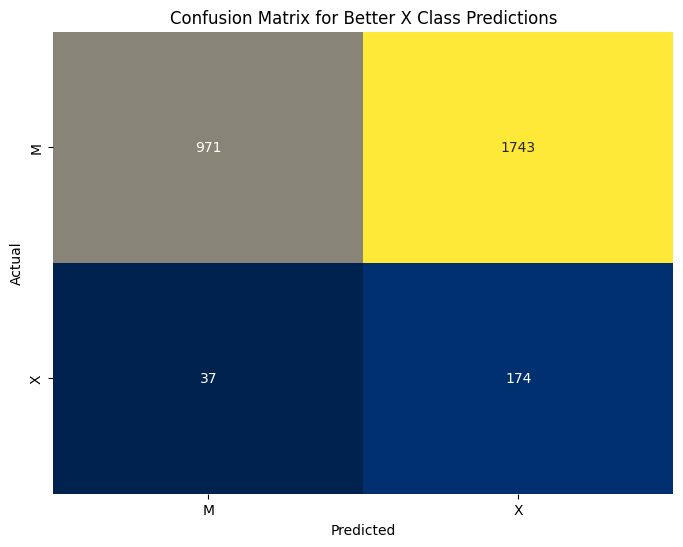

In [ ]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['M', 'X'], yticklabels=['M', 'X'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Better X Class Predictions")

plt.show()

##3.2 -kernel="rbf", random_state=42,C=1,gamma=1 these parameters with the data balanced by using SMOTENN technique

Accuracy : 0.73


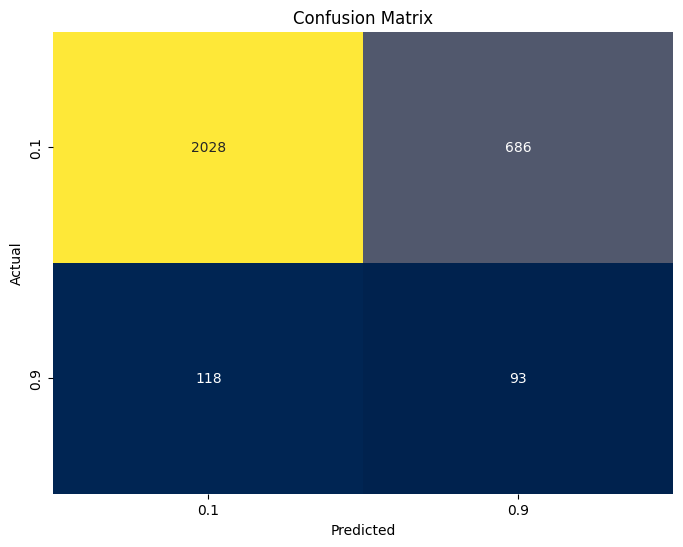

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", random_state=42,C=1,gamma=10)
clf.fit(X_smoteenn,y_smoteenn)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0.1', '0.9'], yticklabels=['0.1', '0.9'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

##3.3 -kernel="rbf", random_state=42,C=1,gamma=1 these parameters with the data balanced by using RANDOMOVERSAMPLER technique

Accuracy : 0.74


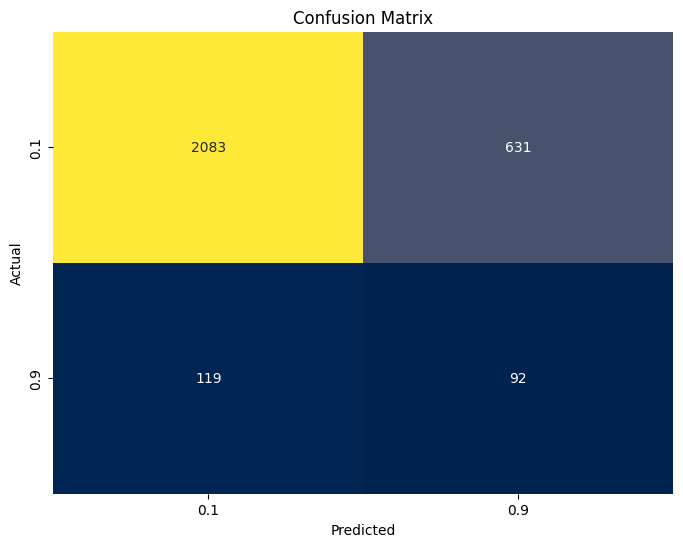

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", random_state=42,C=1,gamma=10)
clf.fit(X_ros,y_ros)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0.1', '0.9'], yticklabels=['0.1', '0.9'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

#Trying cost sensitive technique

Accuracy : 0.77


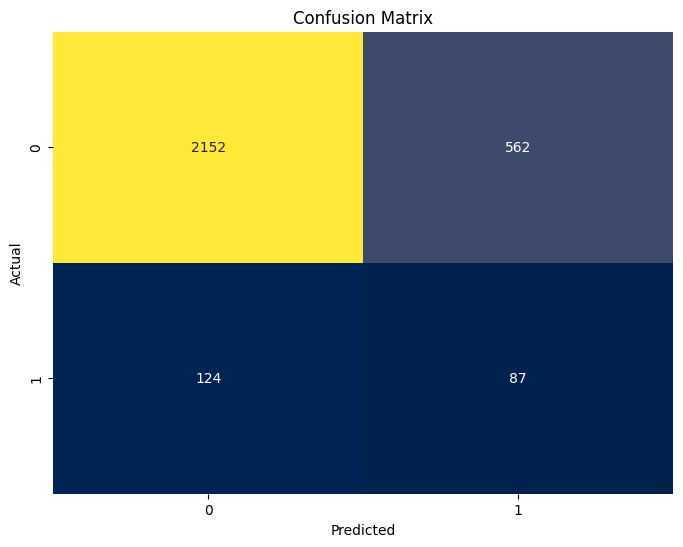

In [ ]:
class_weights = {0: 1, 1: 10}
from sklearn.svm import SVC
clf = SVC(kernel="rbf", random_state=42,C=1,gamma=10,class_weight=class_weights)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0', '1'], yticklabels=['0', '1'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# Example: Fine-tune hyperparameters
xgb_model_tuned = XGBClassifier(random_state=42)

#xgb_model_tuned.fit(X_train_st, y_train_st)
#y_pred_tuned = xgb_model_tuned.predict(X_test)
#accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
#print("Tuned Model Accuracy:", accuracy_tuned)


In [ ]:
n_estimators = [10,20,60,100,120]
learning_rate=[0.1,0.4,0.6,1,1.2]
max_depth = [2,8,None]
subsample = [0.5,0.75,1.0]
colsample_bytree=[0.5,0.75,1.0]


In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
              'learning_rate':learning_rate,
              'subsample':subsample,
              'colsample_bytree':colsample_bytree
             }
print(param_grid)

{'n_estimators': [10, 20, 60, 100, 120], 'max_depth': [2, 8, None], 'learning_rate': [0.1, 0.4, 0.6, 1, 1.2], 'subsample': [0.5, 0.75, 1.0], 'colsample_bytree': [0.5, 0.75, 1.0]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid1 = RandomizedSearchCV(estimator = xgb_model_tuned,
                       param_distributions = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

In [ ]:
rf_grid1.fit(X_train_st,y_train_st)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.75, 1.0],
                                        'learning_rate': [0.1, 0.4, 0.6, 1,
                                                          1.2],
                                        'max_depth': [2, 8, None],
                                        'n_estimators': [10, 20, 60, 100, 120],
                                        'subsample': [0.5, 0.75, 1.0]},
                   verbose=2)

In [ ]:
best_model1=rf_grid1.best_estimator_
y_pred = best_model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


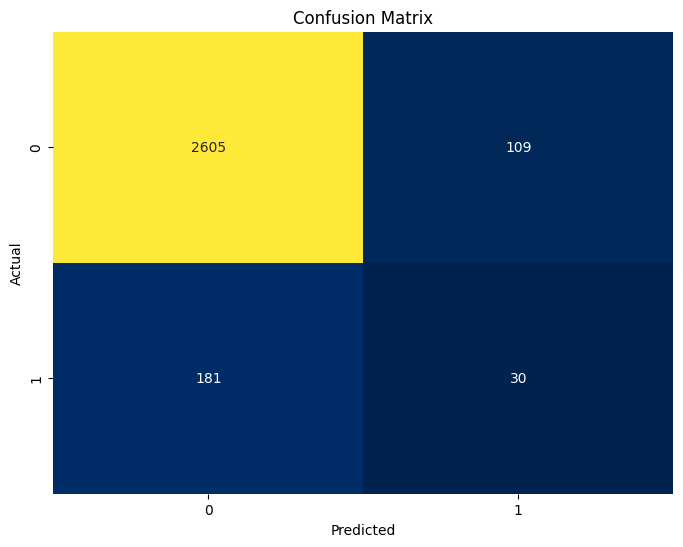

In [ ]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0', '1'], yticklabels=['0', '1'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

#ENSEMBLE METHOD

In [ ]:

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


#class_weights = {0: 0.3, 1: 3}         #kernel="rbf", random_state=42,C=1,gamma=10
model1 = SVC(probability=True)
model2 = RandomForestClassifier(random_state=42)
model3 = XGBClassifier()


learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42

In [ ]:
weights = [1, 1, 1]
ensemble_model = VotingClassifier(estimators=[('rf', model1), ('svm', model2), ('lr', model3)], voting='soft',weights=weights)


In [ ]:
ensemble_model.fit(X_train_st, y_train_st)


VotingClassifier(estimators=[('rf', SVC(probability=True)),
                             ('svm', RandomForestClassifier(random_state=42)),
                             ('lr',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gr...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft', weights=[1, 1, 1])

In [ ]:
cross_val_accuracy = cross_val_score(ensemble_model, X_train_st, y_train_st, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cross_val_accuracy.mean())


Cross-Validation Accuracy: 0.9309298443897541


In [ ]:
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)


Test Set Accuracy: 0.8916239316239316


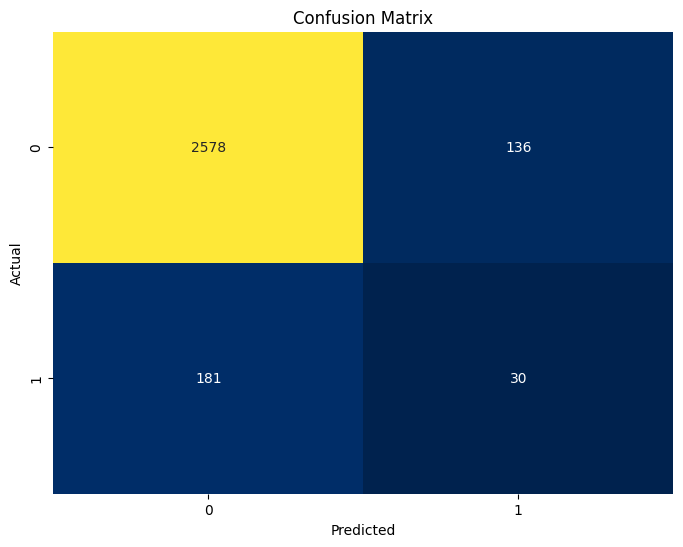

In [ ]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0', '1'], yticklabels=['0', '1'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

#Gradient boosting

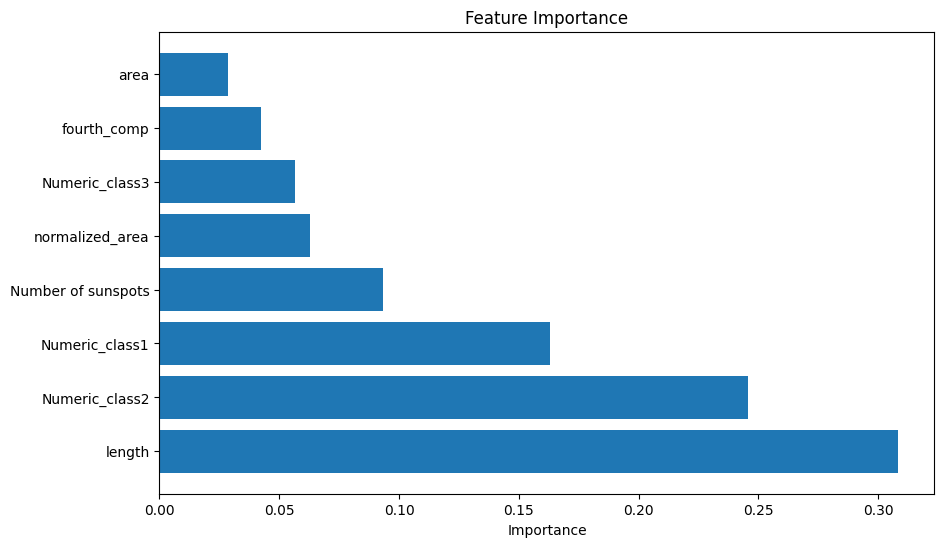

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
model=gb_classifier.fit(X_train_st, y_train_st)

# Get feature importances
feature_importances = gb_classifier.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': feature_importances}
)

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


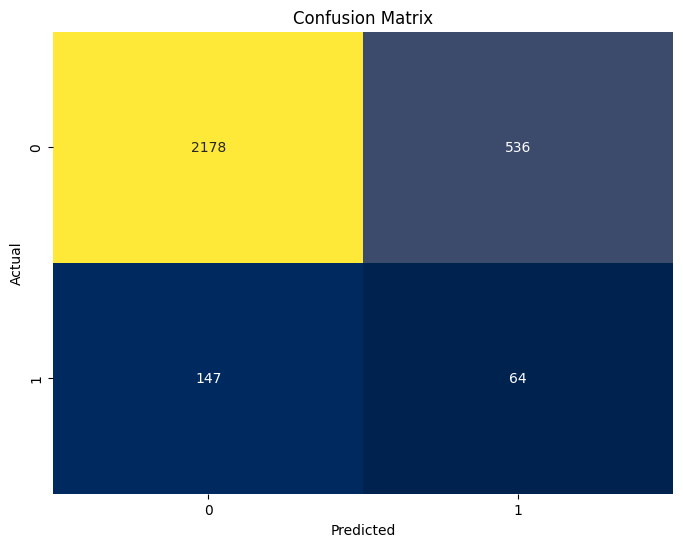

In [ ]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['0', '1'], yticklabels=['0', '1'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

#PCA

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition #PCA

In [ ]:
scaler=StandardScaler()
X_train_st=scaler.fit_transform(X_train_st)
X_test=scaler.transform(X_test)
pca=PCA(n_components=8)

In [ ]:
X_train_trf=pca.fit_transform(X_train_st)
X_test_trf=pca.transform(X_test)

In [ ]:
def plot_pca_variance(e):
    plt.rc('grid', linestyle="--", color='black')
    PCs = ['PC_{}'.format(i+1) for i in range(len(e))]
    plt.scatter(PCs, e*100)
    plt.grid()


varinace [44.51502066 21.26647169 11.53157407  8.26293694  6.07076956  5.72719127
  1.97179228  0.65424353]


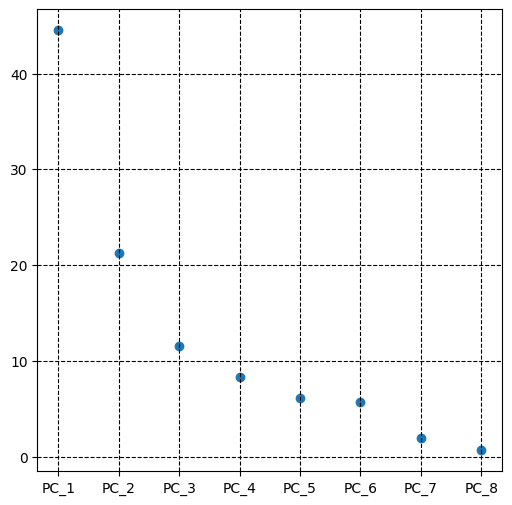

In [ ]:
print('varinace', pca.explained_variance_ratio_*100)
plot_pca_variance(pca.explained_variance_ratio_)

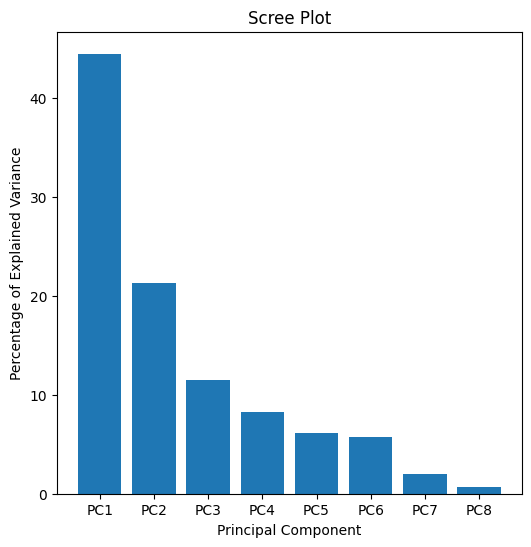

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var , tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

three PCA components are explaining almost 80% variance so decided to use 3 components for model building

Text(0.5, 0, 'PCA Components')

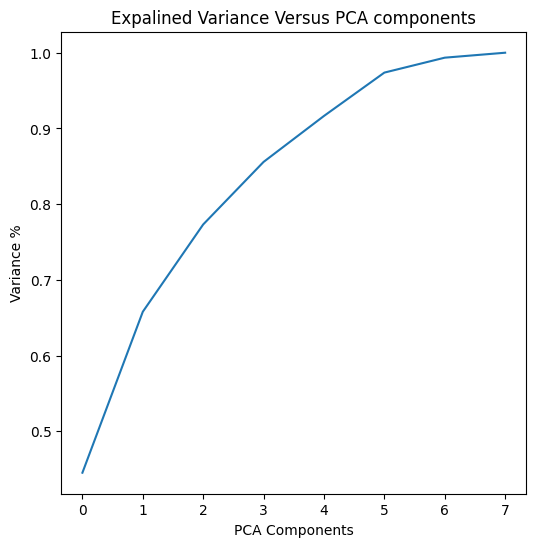

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Expalined Variance Versus PCA components")
plt.ylabel("Variance %")
plt.xlabel("PCA Components")

#Model training with 3 components


In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA



pipeline = make_pipeline(
    RandomOverSampler(),
    PCA(n_components=3),
    RandomForestClassifier()
)

param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [4, 6, 8],
    'randomforestclassifier__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 50}
Best Accuracy: 0.70


In [ ]:
best_model=grid_search.best_estimator_
best_model.fit(X_train,y_train)

Pipeline(steps=[('randomoversampler', RandomOverSampler()),
                ('pca', PCA(n_components=3)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=4, n_estimators=50))])

In [ ]:
y_pred=best_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.47      0.63      2714
           1       0.10      0.75      0.18       211

    accuracy                           0.49      2925
   macro avg       0.53      0.61      0.40      2925
weighted avg       0.90      0.49      0.60      2925



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[1269 1445]
 [  52  159]]


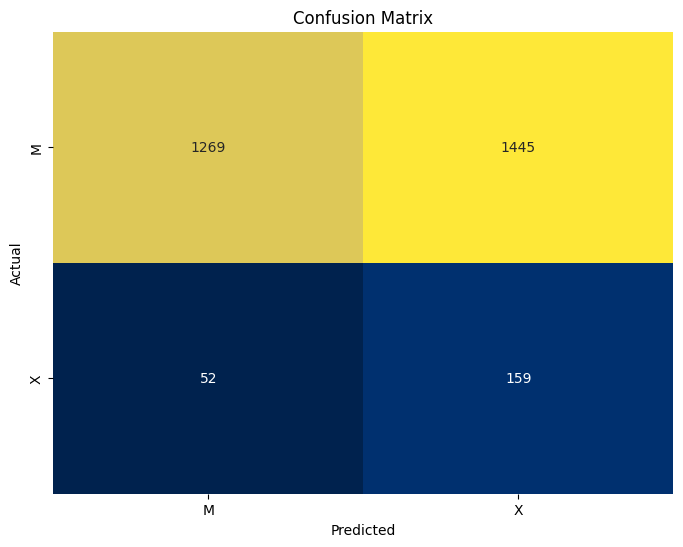

In [ ]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d",  xticklabels=['M', 'X'], yticklabels=['M', 'X'],cbar=False,cmap="cividis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

#precision/Recall Tradeoff

In [ ]:
yprob = best_model.predict_proba(X_test)
yprob

array([[0.68010731, 0.31989269],
       [0.43476426, 0.56523574],
       [0.64226457, 0.35773543],
       ...,
       [0.61455835, 0.38544165],
       [0.44931177, 0.55068823],
       [0.43052989, 0.56947011]])

In [ ]:
import numpy as np

# Assuming y_scores is the array of predicted probabilities
threshold = 0.42

# Apply thresholding to get the predicted labels
predicted_labels = np.where(yprob[:, 1] > threshold, 1, 0)

# Now 'predicted_labels' contains the binary predictions based on the threshold
predicted_labels

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_labels)

print(cm)

[[ 922 1792]
 [  29  182]]


In [ ]:
from sklearn.metrics import precision_score, recall_score
pr = precision_score(
    y_test,
    predicted_labels,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
re = recall_score(
    y_test,
    predicted_labels,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)

In [ ]:
pr, re


(0.07215332581736189, 0.909952606635071)

In [ ]:
100/100

1.0

In [ ]:
pr_list=[]
re_list=[]
thresh=[]
for i in range(-70,100,1):
  value = i / 100.0
  thresh.append(value)

  import numpy as np

# Assuming y_scores is the array of predicted probabilities
  threshold = value

# Apply thresholding to get the predicted labels
  predicted_labels = np.where(yprob[:, 1] > threshold, 1, 0)

# Now 'predicted_labels' contains the binary predictions based on the threshold
  predicted_labels
  pr = precision_score(
    y_test,
    predicted_labels,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
                 )
  pr_list.append(pr)
  re = recall_score(
      y_test,
      predicted_labels,
      labels=None,
      pos_label=1,
      average='binary',
      sample_weight=None,
      zero_division='warn',
      )
  re_list.append(re)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

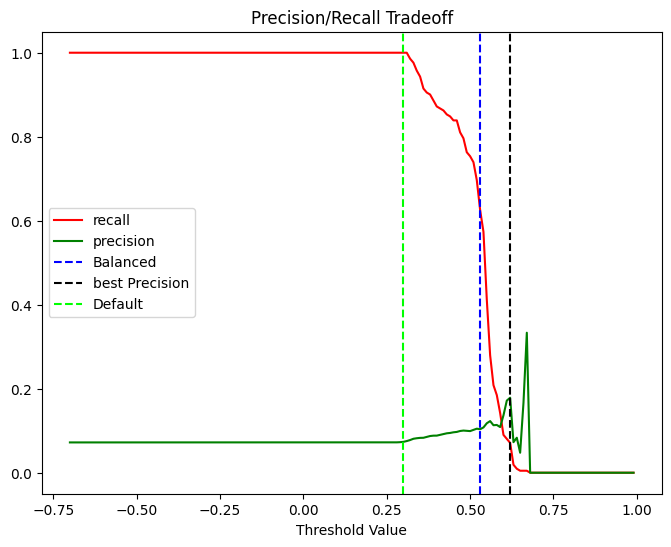

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(thresh,re_list,label="recall",color="red")
plt.plot(thresh,pr_list,label="precision",color="green")
plt.axvline(x=0.53, color='blue', linestyle='--', label='Balanced')
#plt.text(0.55, 0.4, '0.53', color='blue', rotation=45, va='baseline',size="large",style="oblique")

plt.axvline(x=0.62, color='black', linestyle='--', label='best Precision')
plt.axvline(x=0.30, color='lime', linestyle='--', label='Default')
plt.xlabel("Threshold Value")
plt.title("Precision/Recall Tradeoff")
plt.legend()
plt.show()


there's tradeoff between precision and recall if we want better precesion we can set threshhold value to 0.60, better precsion mean M class flares will be predicted more better. and if we want to predict X class flares correctly we can set the threshold value to 0.30 it will predict X class flares almost correct but M class flares prediction will get worse that's the better recall, by improving recall we will predict X class flares better.
normal threshold value is 0 by default